<a href="https://colab.research.google.com/github/Devan5622/simplelinearregression/blob/master/Implement_knn_classifier_and_compare_result_with_naivy_bayes_and_logistic_regression_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn]))) 
   
   
   
import numpy as np
import pandas as pd
import seaborn as sb

df=pd.read_csv('titanic.csv')
df.head()

Saving titanic.csv to titanic.csv
User uploaded file "titanic.csv" with length 61194 bytes


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
cols_to_drop=['Name','Ticket','Cabin']
df=df.drop(cols_to_drop, axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S


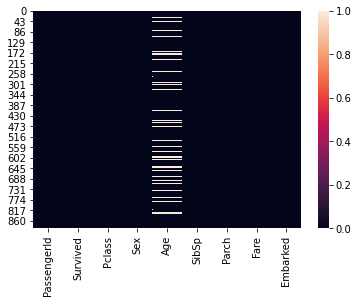

In [3]:
sb.heatmap(df.isnull())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


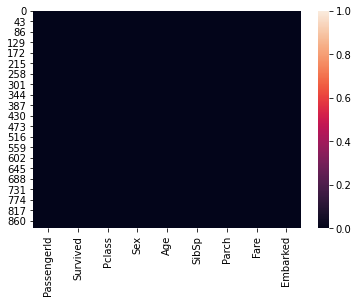

In [4]:
df['Age']=df['Age'].interpolate()
sb.heatmap(df.isnull())
df=df.dropna()
df.head()

In [5]:
EmbarkedColumnDummy= pd.get_dummies(df['Embarked'])
SexColumnDummy= pd.get_dummies(df['Sex'])

In [6]:
df=pd.concat((df,EmbarkedColumnDummy,SexColumnDummy),axis=1)
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1
5,6,0,3,male,44.5,0,0,8.4583,Q,0,1,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,S,0,0,1,0,1
7,8,0,3,male,2.0,3,1,21.0750,S,0,0,1,0,1
8,9,1,3,female,27.0,0,2,11.1333,S,0,0,1,1,0
9,10,1,2,female,14.0,1,0,30.0708,C,1,0,0,1,0


In [7]:

#Drop the redundant columns thus converted
df=df.drop(['Sex','Embarked'],axis=1)

#Seprate the data frame into x & y data
x=df.values
y=df['Survived'].values

#Delete the survived column from x
x=np.delete(x,1,axis=1)


#Split the dataset into 70% Training & 30%Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [9]:
names = ["Nearest_Neighbors","Naive_Bayes","Logistic_Regression"]


classifiers = [
      KNeighborsClassifier(3),
      GaussianNB(),
    LogisticRegression()]

In [10]:

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Nearest_Neighbors,0.580524
1,Naive_Bayes,0.760300
2,Logistic_Regression,0.764045


In [13]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Nearest_Neighbors,0.580524
1,Naive_Bayes,0.760300
2,Logistic_Regression,0.764045


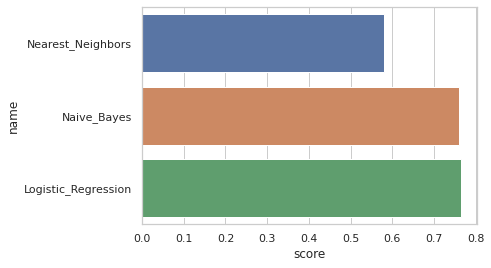

In [14]:

sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)